# 경사 하강법(Gradient Descent)

In [1]:
import warnings
warnings.filterwarnings('ignore')

## Machine( ) 정의
- numpy Package

In [2]:
import numpy as np

In [5]:
# def Machine( )

def Machine(x, w, b):
    y_hat = (w * x) + b
    return y_hat

In [7]:
# x, w, b 객체 임의 지정

x = np.array([1, 3, 5, 7, 9])
w = 2
b = 1

In [8]:
# Machine( ) 테스트
Machine(x, w, b)

array([ 3,  7, 11, 15, 19])

## Gradient( ) 정의
- def Gradient( )

In [9]:
def Gradient(x, y, w, b):
    y_hat = Machine(x, w, b)

    dw = np.mean((y - y_hat) * (-2 * x)) # 편미분(기울기=가중치)
    db = np.mean((y - y_hat) * (-2)) # 편미분(절편=편향)

    return dw, db

In [10]:
# Gradient( ) 테스트

y = np.array([2, 4, 6, 8, 10])

dw, db = Gradient(x, y, w, b)

In [11]:
print('dw is ', dw)  # 편미분된 기울기 변화량 
print('db is ', db)  # 편미분된 절편의 변화량

dw is  66.0
db is  10.0


## Learning( ) 정의
def Learning( )

In [13]:
def Learning(x, y, w, b, step):  # 학습률(learning late)
    dw, db = Gradient(x, y, w, b)
    
    uw = w - step * dw
    ub = b - step * db
    
    return uw, ub

In [14]:
step = 0.05  # 몇 칸씩 이동할까? : 사람이 임의로 지정(=하이퍼파라미터 튜닝)
             # 직감과 실험을 통해 최적화된 수치를 찾아야 한다! 
uw, ub = Learning(x, y, w, b, step)

In [15]:
print('Updated_w is ', '%.3f' % uw)  
print('Updated_b is ', '%.3f' % ub)

# 실제로 얼마나 움직일지(기울기에 대한 변화값, 절편에 대한 변화값) 계산

Updated_w is  -1.300
Updated_b is  0.500


## testData.csv에 적용
pandas & matplotlib Packages

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

In [22]:
# Read testData.csv
url = 'https://raw.githubusercontent.com/rusita-ai/pyData/master/testData.csv'

DATA = pd.read_csv(url)

In [18]:
DATA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   inputs   5000 non-null   float64
 1   outputs  5000 non-null   float64
dtypes: float64(2)
memory usage: 78.2 KB


In [19]:
DATA.head()

,inputs,outputs
0,0.2362,0.162367
1,0.9415,0.479356
2,0.3495,0.095733
3,0.3200,-0.111783
4,0.8335,0.386012


## testData.csv Visualization
- Distribution

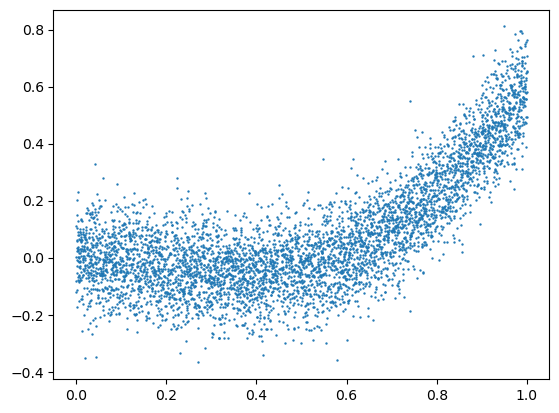

In [21]:
plt.scatter(DATA.inputs, DATA.outputs, s = 0.5)
plt.show()

### 1500번 학습 실행

In [23]:
w = 2
b = 3
step = 0.05 # step은 0.05로 줘볼까? (하이퍼파라미터 튜닝)

In [24]:
for i in range(0, 1500):  # 학습을 1500번 돌려볼까? (이것도 하이퍼파라미터 튜닝)
    uw, ub = Learning(DATA.inputs, DATA.outputs, w, b, step)
    w = uw
    b = ub

In [25]:
print('Learned_w is ', '%.3f' % w)
print('Learned_b is ', '%.3f' % b)

Learned_w is  0.505
Learned_b is  -0.170


### 학습결과 회귀선 그리기

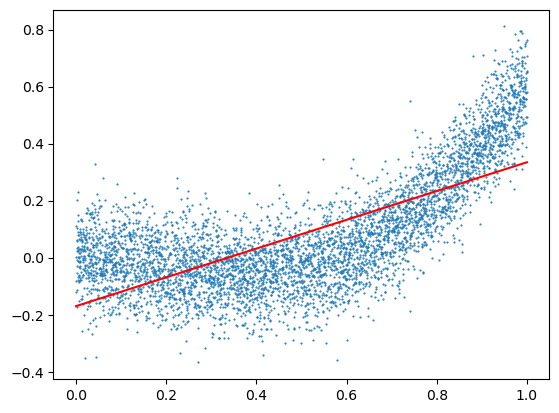

In [26]:
X = np.linspace(0, 1, 100)  # <- 이건 그냥 시각화 플롯을 그리기 위한 설정일 뿐
Y = (w * X) + b # 위에서 1500번 학습에 의해 학습된 w, b를 적용한 것

plt.scatter(DATA.inputs, DATA.outputs, s = 0.3)
plt.plot(X, Y, '-r', linewidth = 1.5)
plt.show()

## Loss(MSE) Visualization
- Gradient( )에 MSE 추가

In [27]:
def Gradient(x, y, w, b):
    y_hat = Machine(x, w, b)
    
    dw = np.mean((y - y_hat) * (-2 * x))
    db = np.mean((y - y_hat) * (-2))
    MSE = np.mean((y - y_hat)**2)  # MSE 값을 추가 , 위에선 기울기와 절편만 적용함

    return dw, db, MSE

## Learning( )에 MSE 추가

In [28]:
def Learning(x, y, w, b, step):
    dw, db, MSE = Gradient(x, y, w, b)
    
    uw = w - step * dw
    ub = b - step * db

    return uw, ub, MSE

In [29]:
# 스텝은 0.001, 학습은 1500번 실행
w = 2
b = 3
step = 0.001
mse = []

In [30]:
for i in range(0, 1500):
    uw, ub, MSE = Learning(DATA.inputs, DATA.outputs, w, b, step)

    w = uw
    b = ub
    mse.append(MSE)  # MSE 값을 매 학습마다 적용 

## Loss(MSE) 감소 확인

In [32]:
mse[0:10]

[15.595575679087718,
 15.51649361545252,
 15.43781315527885,
 15.359532259084672,
 15.281648897745166,
 15.204161052440112,
 15.127066714601563,
 15.050363885861781,
 14.974050578001444,
 14.8981248128981]

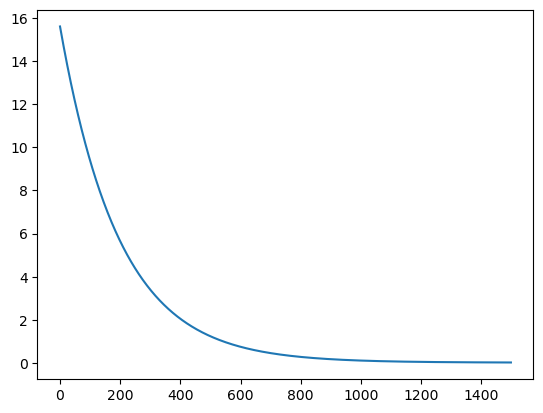

In [33]:
plt.plot(mse)
plt.show() 
# 학습 1500회로 설정했지만
# 결과를 보니 학습은 800번대까지만 실행해도 적당했겠다(완만해진 기울기를 보니까)

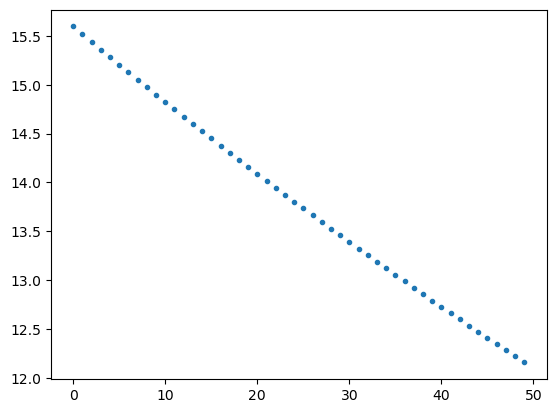

In [37]:
plt.plot(mse[0:50], '.')
plt.show()  
# 그렇지만 전체를 보지 않고 극히 일부분만 봐선 얼마의 학습량이 적당한지 알 수 없다
# 그냥 직선으로만 보이고, 기울기가 완만해지는 지점을 확인할 수 없음

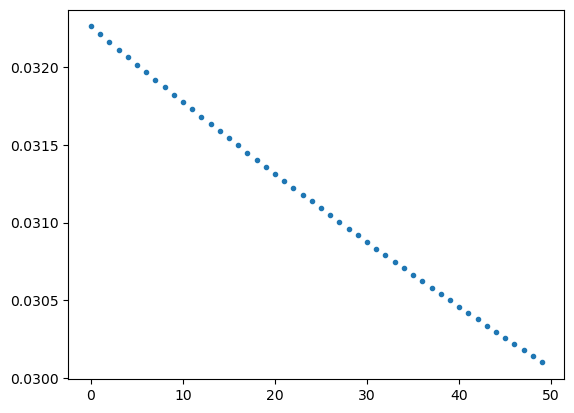

In [35]:
plt.plot(mse[1450:1500], '.')
plt.show()

---

# Model Validation

In [38]:
import warnings
warnings.filterwarnings('ignore')

## Model Capacity
- 모델을 몇 차 함수로 표현할래? (sns.regplot : 다항 회귀식)
- 그러나 모델의 차수를 무조건 높이는 건 안됨 -> 변동성이 커지므로 예측 정확도에 부적 영향을 미칠 수 있다
- import Packages

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

- pandas DataFrame
    - 'Electric.csv' From github

In [40]:
url = 'https://raw.githubusercontent.com/rusita-ai/pyData/master/Electric.csv'

Elec = pd.read_csv(url)

Elec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   compactness                768 non-null    float64
 1   surface_area               768 non-null    float64
 2   wall_area                  768 non-null    float64
 3   roof_area                  768 non-null    float64
 4   height                     768 non-null    float64
 5   orientation                768 non-null    int64  
 6   glazing_area               768 non-null    float64
 7   glazing_area_distribution  768 non-null    int64  
 8   electricity                768 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 54.1 KB


In [41]:
# y=electricity, x=surface_area
Elec.head() 

,compactness,surface_area,wall_area,roof_area,height,orientation,glazing_area,glazing_area_distribution,electricity
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,155.5
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,155.5
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,155.5
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,155.5
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,208.4


### 산점도(surface_area vs. electricity)

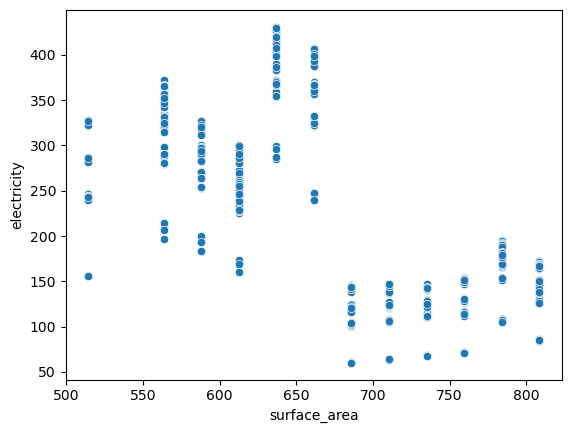

In [42]:
sns.scatterplot(x = Elec['surface_area'], y = Elec['electricity'])
plt.show()

# 값이 파편화 되어 있다! 이러면 회귀선을 어떻게 구해....

### 1차 모델 시각화

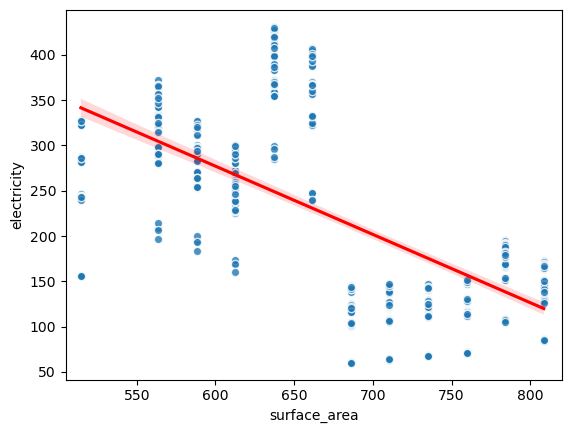

In [43]:
# regplot 방정식의 차수를 자동으로 높여준다
sns.regplot(x = 'surface_area', y = 'electricity', data = Elec,  
            line_kws = {'color':'red'},
            scatter_kws = {'edgecolor' : 'white'})
plt.xlim(505, 820)
plt.show()

### 2차 모델 시각화

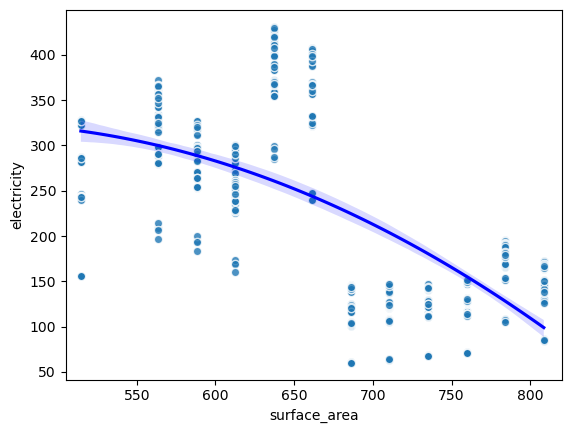

In [44]:
sns.regplot(x = 'surface_area', y = 'electricity', data = Elec,
            line_kws = {'color':'blue'},
            scatter_kws = {'edgecolor' : 'white'},
            order = 2) # order 다항식 회귀식을 위한 항의 개수
                       # order = 2 입력했더니 직선이 곡선으로 바뀜~ (2차 모델)
plt.xlim(505, 820)
plt.show()

### 5차 모델 시각화

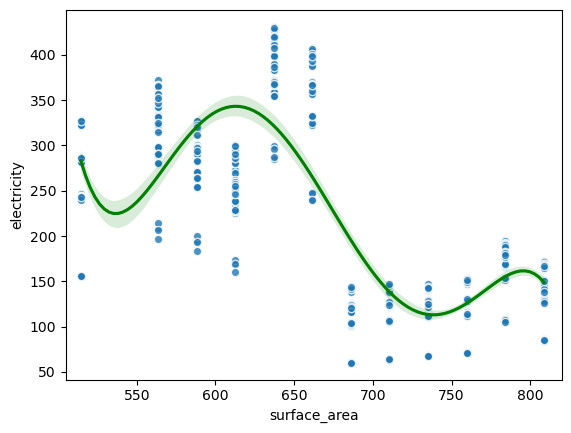

In [45]:
sns.regplot(x = 'surface_area', y = 'electricity', data = Elec,
            line_kws = {'color':'green'},
            scatter_kws = {'edgecolor' : 'white'},
            order = 5) # 5차 모델
plt.xlim(505, 820)
plt.show()

### 9차 모델 시각화

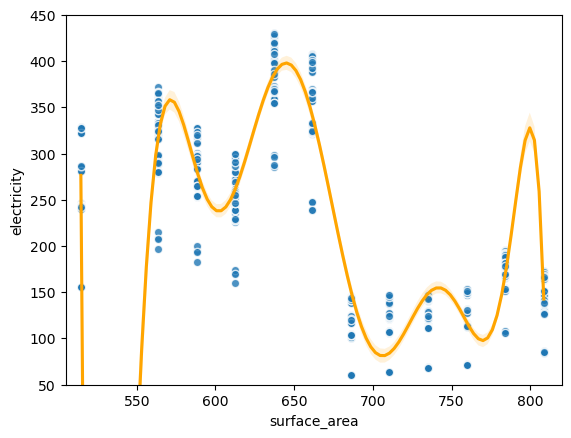

In [46]:
sns.regplot(x = 'surface_area', y = 'electricity', data = Elec,
            line_kws = {'color':'orange'},
            scatter_kws = {'edgecolor':'white'},
            order = 9) # 9차 모델
plt.xlim(505, 820)
plt.ylim(50, 450)
plt.show()

## 4개 모델 비교 시각화

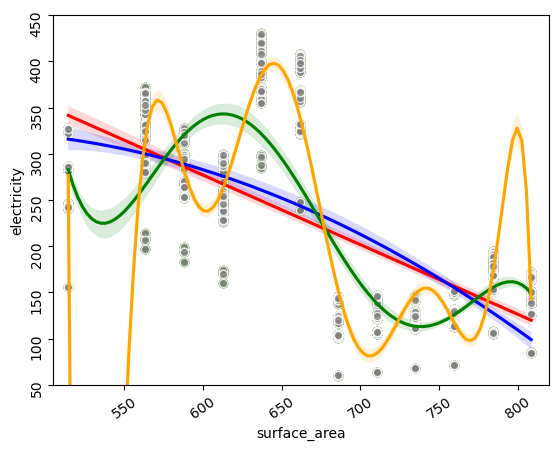

In [47]:
sns.regplot(x = 'surface_area', y = 'electricity', 
            data = Elec, 
            line_kws = {'color':'red'})
sns.regplot(x = 'surface_area', y = 'electricity', 
            data = Elec, 
            line_kws = {'color':'blue'}, order = 2)
sns.regplot(x = 'surface_area', y = 'electricity', 
            data = Elec, 
            line_kws = {'color':'green'}, order = 5)
sns.regplot(x = 'surface_area', y = 'electricity', 
            data = Elec, 
            line_kws = {'color':'orange'}, order = 9,
            scatter_kws = {'color':'gray', 'edgecolor':'white'})
plt.xlim(505, 820)
plt.ylim(50, 450)
plt.xticks(rotation = 35)
plt.yticks(rotation = 90)
plt.show()

## Training Error
- traing error : 트레이닝 데이터에 모델을 적용하여 확인한 실제값과 예측값의 차이(잔차)  

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [49]:
url = 'https://raw.githubusercontent.com/rusita-ai/pyData/master/Electric.csv'

Elec = pd.read_csv(url)

Elec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   compactness                768 non-null    float64
 1   surface_area               768 non-null    float64
 2   wall_area                  768 non-null    float64
 3   roof_area                  768 non-null    float64
 4   height                     768 non-null    float64
 5   orientation                768 non-null    int64  
 6   glazing_area               768 non-null    float64
 7   glazing_area_distribution  768 non-null    int64  
 8   electricity                768 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 54.1 KB


### 1차 모델 Training Error
- X_train and y_train

In [50]:
# 일단 모델을 나누지 않고 진행해보자 ~ (원래는 tarin, test 분리해서 따로 진행해야 함)
X_train = Elec[['surface_area']] 
y_train = Elec['electricity']

X_train.shape, y_train.shape

((768, 1), (768,))

- 모델 생성

In [51]:
from sklearn.linear_model import LinearRegression

Model_1 = LinearRegression() # 회귀 모델 객체 만들기
Model_1.fit(X_train, y_train) # 객체에 데이터를 적용(fit)

# 객체로 만들었으니 매서드를 쓸 수 있다!

LinearRegression()

- 모델 정보(학습결과) 확인

In [52]:
print(Model_1.coef_) # w
print(Model_1.intercept_) # b

[-0.75387157]
729.4538243006992


- y_hat(예측값) 생성

In [53]:
y_hat_1 = Model_1.predict(X_train) # 모델로 예측할거야

len(y_hat_1)

768

- MSE(Mean Squared Error) 계산

In [54]:
TR_Err_1 = np.mean((y_train - y_hat_1) ** 2)
TR_Err_1

# 내가 훈련시킨 모형으로 훈련데이터를 예측한 결과 

5763.983779426344

### 5차 모델 Training Error
- X 다항차수 변환
    - (768, 1) to (768, 5)

In [55]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 5, include_bias = False)
PX_5 = poly.fit_transform(X_train) # 이건 다항식으로 만들기 위해 다항식으로 변환한 것
                                   # 모델을 생성한 게 아님

In [56]:
X_train[:3]

,surface_area
0,514.5
1,514.5
2,514.5


In [57]:
PX_5[:3]

array([[5.14500000e+02, 2.64710250e+05, 1.36193424e+08, 7.00715165e+10,
        3.60517952e+13],
       [5.14500000e+02, 2.64710250e+05, 1.36193424e+08, 7.00715165e+10,
        3.60517952e+13],
       [5.14500000e+02, 2.64710250e+05, 1.36193424e+08, 7.00715165e+10,
        3.60517952e+13]])

In [58]:
X_train.shape, PX_5.shape
# 차원이 늘어난 것을 확인할 수 있다

((768, 1), (768, 5))

- 5차 모델 생성

In [59]:
from sklearn.linear_model import LinearRegression

Model_5 = LinearRegression()
Model_5.fit(PX_5, y_train)

LinearRegression()

- 모델 정보(학습결과) 확인

In [ ]:
# np.set_printoptions?

In [60]:
# precision 부동소수점 출력의 정밀도 자릿수(기본값 8)
# suppress False인 경우 과학적 표기법 사용(True인 경우 항상 고정소수점으로 부동소수점숫자 출력)
np.set_printoptions(suppress = True, precision = 40)

print(Model_5.coef_)
print(Model_5.intercept_) # 5개 차원이라 5개의 기울기가 산출됨 

[-0.0003155143829556425        -0.10292961478154922
  0.000378761367871292         -0.0000005032062986879829
  0.00000000022980588499206013]
2906.225912957205


- y_hat(예측값) 생성

In [61]:
PX_5_pred = poly.fit_transform(X_train)

y_hat_5 = Model_5.predict(PX_5_pred)

y_hat_5.shape

(768,)

- MSE(Mean Squared Error) 계산

In [62]:
TR_Err_5 = np.mean((y_train - y_hat_5) ** 2)
TR_Err_5

4177.726330731101

### 9차 모델 Training Error
- X 다항차수 변환
    - (768, 1) to (768, 9)

In [63]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 9, include_bias = False)
PX_9 = poly.fit_transform(X_train)

In [64]:
X_train.shape, PX_9.shape

((768, 1), (768, 9))

- 모델 생성

In [65]:
from sklearn.linear_model import LinearRegression

Model_9 = LinearRegression()
Model_9.fit(PX_9, y_train)

LinearRegression()

- 모델 정보(학습결과) 확인

In [66]:
print(Model_9.coef_)
print(Model_9.intercept_)

[ 0.0000000000000000000000000479174184661833
  0.000000000000000000362087607677489
  0.000000000000000000021861377646789166
  0.000000000000000009606888762471482
  0.0000000000000031773264062112594
  0.0000000000006336691114056866
 -0.00000000000000228805896410869
  0.000000000000000002775149473844114
 -0.0000000000000000000011271003953339056   ]
-440.08258376559286


- y_hat(예측값) 생성

In [67]:
PX_9_pred = poly.fit_transform(X_train)

y_hat_9 = Model_9.predict(PX_9_pred)

y_hat_9.shape

(768,)

- MSE(Mean Squared Error) 계산

In [68]:
TR_Err_9 = np.mean((y_train - y_hat_9) ** 2)
TR_Err_9

4086.7199908145762

## 3개 모델 Training Error 비교

In [70]:
print('1차 모델 : ', TR_Err_1)
print('5차 모델 : ', TR_Err_5)
print('9차 모델 : ', TR_Err_9)

1차 모델 :  5763.983779426344
5차 모델 :  4177.726330731101
9차 모델 :  4086.7199908145762


---

# Testing Error
- import Packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
url = 'https://raw.githubusercontent.com/rusita-ai/pyData/master/Electric.csv'

Elec = pd.read_csv(url)

Elec.shape

(768, 9)

## Train_Data vs. Test_Data
### DataFrame Split
- 8:2 Split(614:154)
- 80% Train_DF & 20% Test_DF

In [3]:
from sklearn.model_selection import train_test_split

TR_Elec, TE_Elec = train_test_split(Elec, 
                                    test_size = 0.2, 
                                    random_state = 2045) # 랜덤 적용 필수
                             # 안그러면 같은 값으로 반복학습할 우려가 있음

In [4]:
TR_Elec.shape, TE_Elec.shape

((614, 9), (154, 9))

- 80% TR_Elec DataFrame

In [5]:
TR_Elec.head()

,compactness,surface_area,wall_area,roof_area,height,orientation,glazing_area,glazing_area_distribution,electricity
555,0.74,686.0,245.0,220.5,3.5,5,0.40,1,145.5
355,0.79,637.0,343.0,147.0,7.0,5,0.25,2,389.8
200,0.86,588.0,294.0,147.0,7.0,2,0.10,4,264.4
669,0.62,808.5,367.5,220.5,3.5,3,0.40,3,163.5
561,0.69,735.0,294.0,220.5,3.5,3,0.40,1,147.0


- 20% TE_Elec DataFrame

In [6]:
TE_Elec.head()

,compactness,surface_area,wall_area,roof_area,height,orientation,glazing_area,glazing_area_distribution,electricity
414,0.71,710.5,269.5,220.50,3.5,4,0.25,3,121.0
475,0.64,784.0,343.0,220.50,3.5,5,0.25,4,166.2
511,0.71,710.5,269.5,220.50,3.5,5,0.25,5,122.7
213,0.76,661.5,416.5,122.50,7.0,3,0.10,4,323.8
339,0.98,514.5,294.0,110.25,7.0,5,0.25,2,286.0


### Array Split
- DataFrame 대신 Array(=x와 y를 지정)를 넣어서도 Split이 가능하다
- 보다 세밀한 분리가 가능하다 
- X_train, X_test & y_train, y_test     # 데이터를 보다 세분화할 수 있다

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Elec[['surface_area']], 
                                                    Elec['electricity'], 
                                                    test_size = 0.2, 
                                                    random_state = 2045)

In [8]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape 

((614, 1), (614,), (154, 1), (154,))

- 80% X_train Array

In [9]:
X_train.head()

,surface_area
555,686.0
355,637.0
200,588.0
669,808.5
561,735.0


- 80% y_train Array

In [10]:
y_train.head()

555    145.5
355    389.8
200    264.4
669    163.5
561    147.0
Name: electricity, dtype: float64

### Distribution Visualization
- Train Data

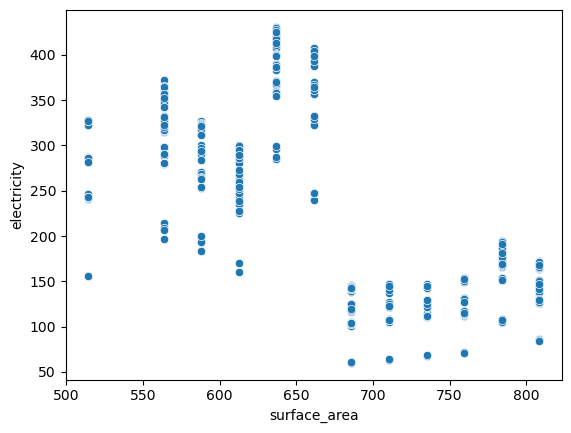

In [11]:
sns.scatterplot(x = TR_Elec['surface_area'], y = TR_Elec['electricity'])
plt.show()

- Test Data

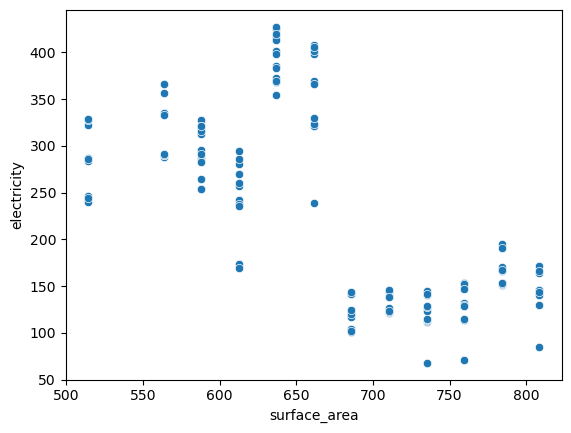

In [12]:
sns.scatterplot(x=TE_Elec['surface_area'], y = TE_Elec['electricity'])
plt.show()
# 분포가 서로 비슷한 경향을 갖도록 노력한 결과

### 1차 모델 Testing Error
- Train_Data로 모델 생성

In [13]:
from sklearn.linear_model import LinearRegression

Model_1 = LinearRegression()
Model_1.fit(X_train, y_train)

LinearRegression()

- Test_Data로 y_hat(예측값) 생성 

In [14]:
y_hat_1 = Model_1.predict(X_test)

y_hat_1.shape

(154,)

- Test_Data로 MSE(Mean Squared Error) 계산

In [15]:
from sklearn.metrics import mean_squared_error

TE_Err_1 = mean_squared_error(y_test, y_hat_1)
TE_Err_1

6044.17654762927

### 5차 모델 Testing Error
Train_Data로 모델 생성

In [16]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 5, include_bias = False)
PX_5_TR = poly.fit_transform(X_train)

In [17]:
from sklearn.linear_model import LinearRegression

Model_5 = LinearRegression()
Model_5.fit(PX_5_TR, y_train)

LinearRegression()

- Test_Data로 y_hat(예측값) 생성

In [18]:
PX_5_TE = poly.transform(X_test)

y_hat_5 = Model_5.predict(PX_5_TE)

- Test_Data로 MSE(Mean Squared Error) 계산

In [19]:
from sklearn.metrics import mean_squared_error

TE_Err_5 = mean_squared_error(y_test, y_hat_5)
TE_Err_5

4330.605341129339

### 9차 모델 Testing Error
Train_Data로 모델 생성

In [20]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 9, include_bias = False)
PX_9_TR = poly.fit_transform(X_train)

In [21]:
from sklearn.linear_model import LinearRegression

Model_9 = LinearRegression()
Model_9.fit(PX_9_TR, y_train)

LinearRegression()

- Test_Data로 y_hat(예측값) 생성

In [22]:
PX_9_TE = poly.transform(X_test)

y_hat_9 = Model_9.predict(PX_9_TE)

- Test_Data로 MSE(Mean Squared Error) 계산

In [24]:
from sklearn.metrics import mean_squared_error

TE_Err_9 = mean_squared_error(y_test, y_hat_9)
TE_Err_9

4238.689067046474

## 3개 모델 Testing Error 비교

In [25]:
print('1차 모델 : ', TE_Err_1)
print('5차 모델 : ', TE_Err_5)
print('9차 모델 : ', TE_Err_9)

1차 모델 :  6044.17654762927
5차 모델 :  4330.605341129339
9차 모델 :  4238.689067046474


---

# Validation Approach

In [26]:
import pandas as pd

In [27]:
url = 'https://raw.githubusercontent.com/rusita-ai/pyData/master/Electric.csv'

Elec = pd.read_csv(url)

Elec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   compactness                768 non-null    float64
 1   surface_area               768 non-null    float64
 2   wall_area                  768 non-null    float64
 3   roof_area                  768 non-null    float64
 4   height                     768 non-null    float64
 5   orientation                768 non-null    int64  
 6   glazing_area               768 non-null    float64
 7   glazing_area_distribution  768 non-null    int64  
 8   electricity                768 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 54.1 KB


## Train vs. Validation vs. Test
- 6:2:2 Split(462:153:153)
### sklearn Package 사용
- train_test_split( )
- 20% Test_Data(153)

In [28]:
## from sklearn.model_selection import train_test_split

X_remain, X_test, y_remain, y_test = train_test_split(Elec[['surface_area']], 
                                                      Elec['electricity'], 
                                                      test_size = int(len(Elec) * 0.2),
                                                      random_state = 2045)

print(X_remain.shape, y_remain.shape)
print(X_test.shape, y_test.shape)

(615, 1) (615,)
(153, 1) (153,)


- 60% Train_Data(462) & 20% Validation_Data(153)

In [29]:
# 남은 80%학습데이터에서 나머지 20%(전체 길이 기준)를 또 추출
X_train, X_valid, y_train, y_valid = train_test_split(X_remain, y_remain, 
                                                      test_size = int(len(Elec) * 0.2), 
                                                      random_state = 2045)

print(X_train.shape, y_train.shape)
print(X_valid.shape, y_valid.shape)
print(X_test.shape, y_test.shape)

(462, 1) (462,)
(153, 1) (153,)
(153, 1) (153,)


- 추후에 모델 학습 메서드의 validation인자를 통해 쉽게 검증 데이터를 분리할 수 있음

### 5차 모델 Validation Error
- Train_Data로 모델 생성

In [30]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 5, include_bias = False)
PX_5_TR = poly.fit_transform(X_train)

In [31]:
from sklearn.linear_model import LinearRegression

Model_5 = LinearRegression()
Model_5.fit(PX_5_TR, y_train)

LinearRegression()

- Validation_Data로 y_hat(예측값) 생성 및 MSE 계산

In [32]:
PX_5_VD = poly.transform(X_valid)

y_hat_5 = Model_5.predict(PX_5_VD)

In [33]:
from sklearn.metrics import mean_squared_error

MSE_5 = mean_squared_error(y_valid, y_hat_5)
MSE_5

4136.418302293197

### 9차 모델 Validation Error
- Train_Data로 모델 생성

In [34]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 9, include_bias = False)
PX_9_TR = poly.fit_transform(X_train)

In [35]:
Model_9 = LinearRegression()
Model_9.fit(PX_9_TR, y_train)

LinearRegression()

- Validation_Data로 y_hat(예측값) 생성 및 MSE 계산

In [36]:
PX9_valid = poly.transform(X_valid)

y_hat_9 = Model_9.predict(PX9_valid)

In [37]:
MSE_9 = mean_squared_error(y_valid, y_hat_9)
MSE_9

3955.973312457907

## 2개 모델 Validation Error 비교

In [38]:
print('5차 모델 MSE_5  : ', MSE_5)
print('9차 모델 MSE_9  : ', MSE_9)

5차 모델 MSE_5  :  4136.418302293197
9차 모델 MSE_9  :  3955.973312457907


## 최종 9차 모델을 Test_Data에 적용
- Test_Data로 y_hat(예측값) 생성 및 MSE 계산

In [39]:
PX9_TE = poly.transform(X_test)

mean_squared_error(y_test, Model_9.predict(PX9_TE))

4220.885732091358